# Exercise 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Creating a correlation matrix heatmap
#### 3. Creating Scatter Plot
#### 4. Creating Pair Plot
#### 5. Answer the questions based on the conducted exploration
#### 6. New questions based on the early findings in this visual exploration
#### 7. Possible Hypotheses at this point

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the created charts are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define a path

folder_path = r'F:\CF\6. Advanced Analytics\Brazilian E-Commerce'

In [4]:
# Import data

df_orders = pd.read_csv(os.path.join(folder_path, '02 Data', 'Prepared Data', 'orders_checked.csv'), index_col = 0)
df_customers = pd.read_csv(os.path.join(folder_path, '02 Data', 'Prepared Data', 'customers_checked.csv'), index_col = 0)
df_products = pd.read_csv(os.path.join(folder_path, '02 Data', 'Prepared Data', 'products_checked.csv'), index_col = 0)
df_items = pd.read_csv(os.path.join(folder_path, '02 Data', 'Prepared Data', 'items_checked.csv'), index_col = 0)
df_reviews = pd.read_csv(os.path.join(folder_path, '02 Data', 'Prepared Data', 'reviews_checked.csv'), index_col = 0)
df_gwolocations = pd.read_csv(os.path.join(folder_path, '02 Data', 'Prepared Data', 'geolocations_checked.csv'), index_col = 0)
df_sellers = pd.read_csv(os.path.join(folder_path, '02 Data', 'Prepared Data', 'sellers_checked.csv'), index_col = 0)
df_payments = pd.read_csv(os.path.join(folder_path, '02 Data', 'Prepared Data', 'payments_checked.csv'), index_col = 0)

In [5]:
# merge 3 dataframes: orders, items, payments

df_orders_items_payments_merged = df_orders.merge(df_items, on="order_id").merge(df_payments, on="order_id")

In [6]:
# merge again with products

df_orders_items_payments_products_merged = df_orders_items_payments_merged.merge(df_products, on="product_id")

In [7]:
# Display the dataframe

df_orders_items_payments_products_merged.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date order_status_grouped  order_item_id  ...  \
0                    2017-10-18            completed              1  ...   
1                    2017-10-18            completed              1  ...   
2                    2017-10-18            completed              1  ...   
3                    2018-08-13            completed              1  ...   
4                    2018-09-04            completed              1  ...   

   product_category_name product_name_length product_description_length  \
0  utilidades_domesticas                  40                        268   
1  utilidades_domesticas                  40                        268   
2  utilidades_domesticas                  40                        268   
3             perfumaria                  29                        178   
4             automotivo                  46                        232   

   product_photos_count  product_weight_g  product_length_cm  \
0                     4             500.0               19.0   
1                     4             500.0               19.0   
2                     4             500.0               19.0   
3                     1             400.0               19.0   
4                     1             420.0               24.0   

  product_height_cm  product_width_cm  category_name  \
0               8.0              13.0     home_goods   
1               8.0              13.0     home_goods   
2               8.0              13.0     home_goods   
3              13.0              19.0      perfumery   
4              19.0              21.0     automotive   

        category_name_grouped  
0              home_furniture  
1              home_furniture  
2              home_furniture  
3          health_beauty_baby  
4  industry_commerce_services  

[5 rows x 29 columns]

In [8]:
# Display the columnds and their data types

df_orders_items_payments_products_merged.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_status_grouped              object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_deadline                 object
price                            float64
shipping_cost                    float64
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
product_category_name             object
product_name_length                int64
product_description_length         int64
product_photos_count               int64
product_weight_g                 float64
product_length_c

### 2. Creating a correlation matrix heatmap

In [9]:
# Create a subset including numeric columns

numeric_cols = ['price', 'shipping_cost', 'payment_installments',
               'product_name_length', 'product_description_length',
               'product_photos_count', 'product_weight_g',
               'product_length_cm', 'product_height_cm', 'product_width_cm']

In [10]:
# Compute correlation matrix

corr_matrix = df_orders_items_payments_products_merged[numeric_cols].corr()

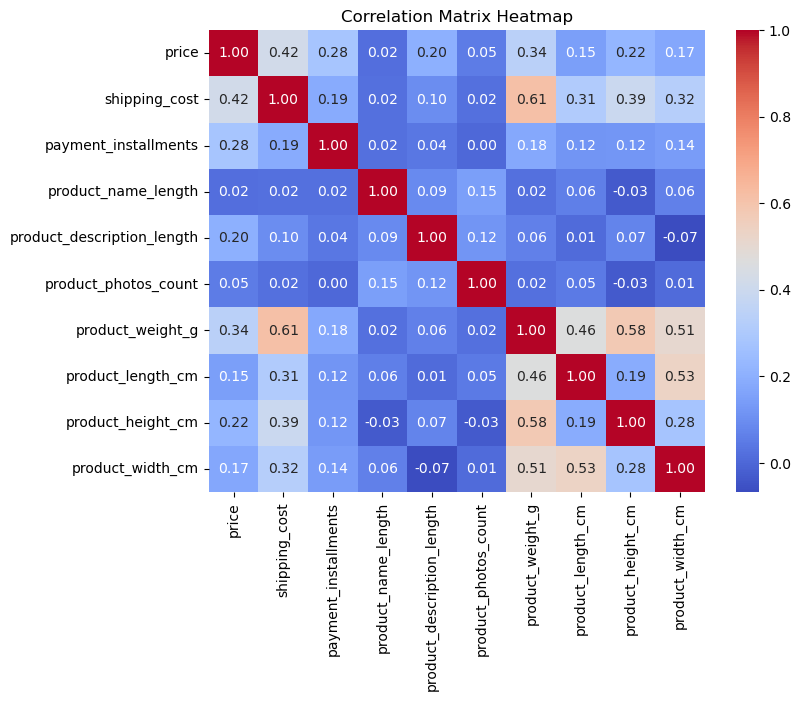

In [11]:
# Plot heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

A **correlation matrix heatmap** is a powerful tool used in data analysis to visualize the strength and direction of linear relationships between multiple variables at once.

The coefficients in the plot represent the correlation between the variable on the y-axis and the variable on the x-axis. This coefficient ranges from -1.00 to +1.00.

- **Sign (Positive or Negative):**

  - A positive coefficient (+) indicates a positive correlation. As one variable increases, the other variable tends to increase as well. In the heatmap, these are represented by warmer colors (orange and red).

  - A negative coefficient (-) indicates a negative correlation. As one variable increases, the other variable tends to decrease. In this specific heatmap, there are no strong negative correlations, but they would be shown in cool colors (blue).

- **Magnitude (The Number Itself):**

  - The closer the coefficient is to 1.00 or -1.00, the stronger the linear relationship. A value of 1.00 (like price vs. price) means a perfect positive linear relationship.

  - The closer the coefficient is to 0.00, the weaker the linear relationship. A value of 0.00 means there is no linear relationship between the variables. These are represented by neutral or light colors (white in this case).

  - A common rule of thumb for interpreting the strength is:

    - 0.6 to 1.0: Strong correlation

    - 0.3 to 0.6: Moderate correlation

    - 0.1 to 0.3: Weak correlation

    - 0.0 t0 0.1 : no correlation


**Key Observations from This Plot:**

**Strongest Positive Correlations:**

- product_weight_g and shipping_cost (0.61): This is a strong positive correlation. It's highly intuitive: as the weight of a product in grams increases, the shipping cost also tends to increase significantly. This is the most prominent relationship in the dataset.

**Moderate Positive Correlations:**

- Product Dimensions Cluster: There are moderate correlations between the physical dimensions of the products:
  - product_length_cm and product_width_cm (0.53)
  - product_weight_g and product_width_cm (0.51)
  - product_weight_g and product_length_cm (0.46)

This cluster makes physical sense. Taller, longer, and wider products tend to be heavier.

- price and shipping_cost (0.42): This is a moderate positive correlation. It suggests that more expensive items tend to have higher shipping costs. This could be due to factors like requiring more packaging, insurance, or simply being larger and heavier items.

**Weak and No Correlations:**

- price and product_name_length (0.02): This coefficient is very close to zero. It means there is essentially no linear relationship between the length of a product's name and its price.
- payment_installments and product_photos_count (0.00): A coefficient of zero indicates no linear relationship whatsoever. The number of photos for a product has no bearing on the number of payment installments offered.
- product_description_length and product_width_cm (-0.07): This is a very weak negative correlation, practically negligible. It implies there's no real connection between how long a product's description is and how wide the product is.


### 3. Creating Scatter Plot

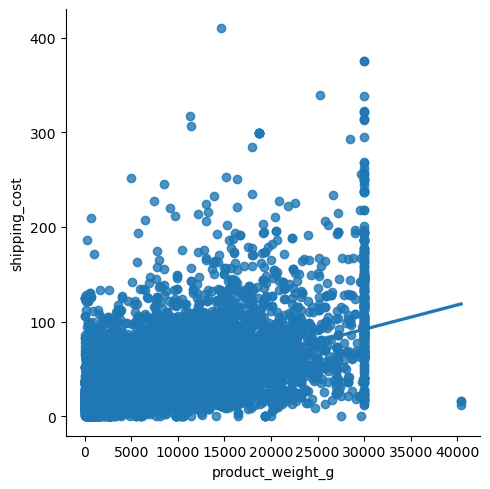

In [12]:
# Create a scatterplot for the product_weight_g and shipping_cost columns

sns.lmplot(x = 'product_weight_g', y = 'shipping_cost', data = df_orders_items_payments_products_merged)

plt.show()

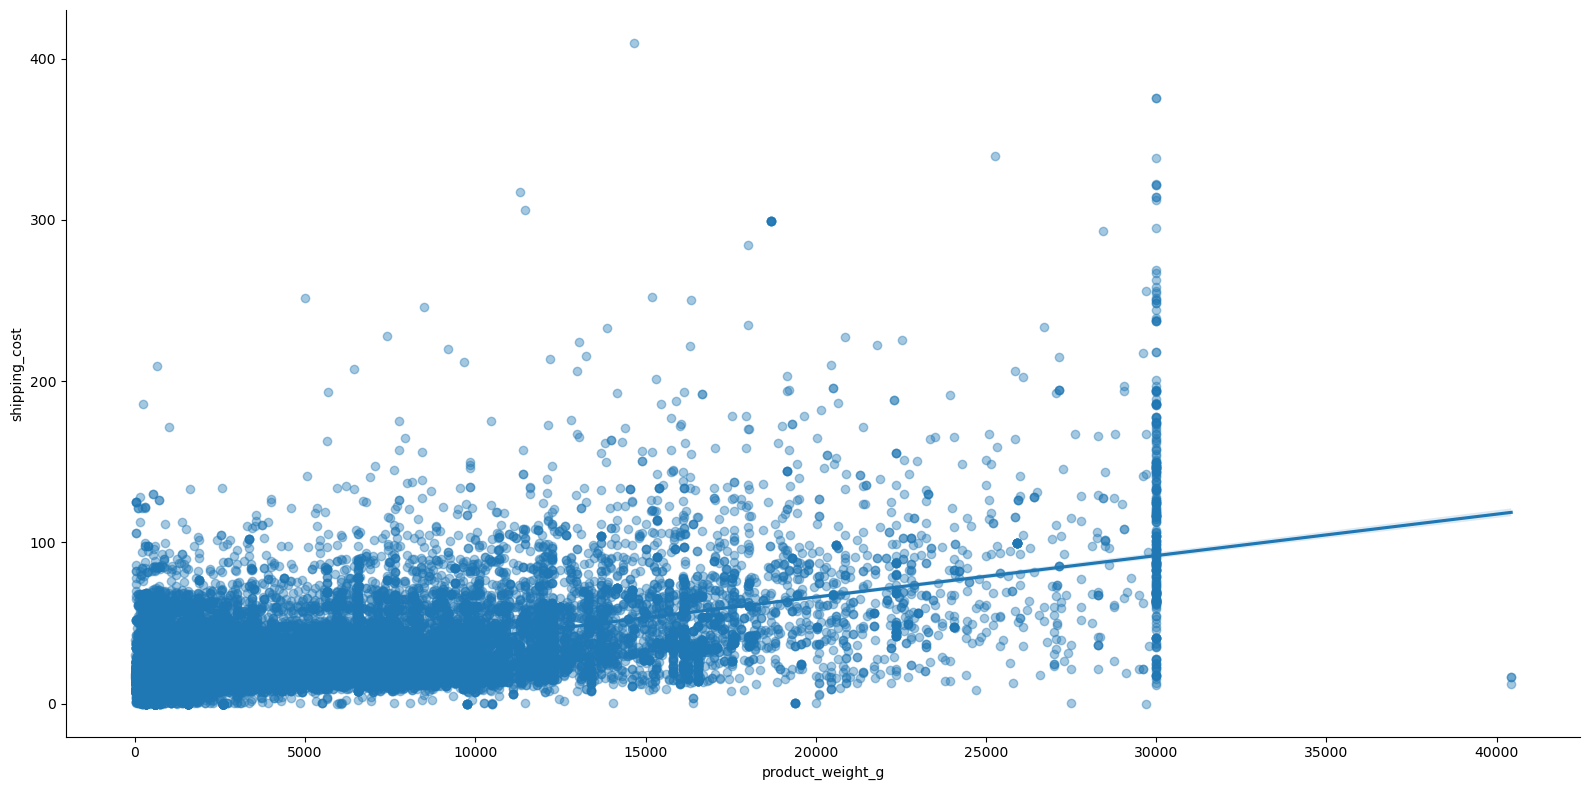

In [13]:
# Make the scatter plot bigger and clrearer

sns.lmplot(
    x='product_weight_g', 
    y='shipping_cost', 
    data=df_orders_items_payments_products_merged,
    height=8,     
    aspect=2,      
    scatter_kws={'alpha':0.4} # alpha parameter controls the transparency of points
)

plt.show()


### Interpretation:

The scatterplot provides a much deeper insight into the relationship between product_weight_g and shipping_cost than the correlation coefficient of 0.61 alone.

#### 1. Confirmation of Positive Correlation

The plot visually confirms the positive correlation that was indicated by the coefficient of 0.61.

- **Upward Trend:** The regression line (the solid line running through the data) has a clear upward slope.
- **Data Cloud:** The general cloud of data points moves from the bottom-left to the top-right.

This means that, as a general rule, as the product weight increases, the shipping cost tends to increase.

#### 2. The Relationship is Not Perfectly Linear

While the trend is positive, the relationship is far from being a perfect straight line. The correlation of 0.61 suggests a moderate-to-strong relationship, but the scatterplot reveals a lot of variance.

- **Wide Spread:** For any given product weight on the x-axis, there is a wide range of possible shipping costs on the y-axis. For example, for products weighing 5,000g, shipping costs can range from near 0 to over 100. This indicates that weight is a significant factor in shipping cost, but not the only one. Other variables (like product category, destination, shipping provider, insurance) also play a large role.

#### 3. High Density in a Specific Region

The vast majority of the data points are heavily concentrated in the bottom-left corner of the plot.

- **Product Weight:** Most products appear to weigh less than 15,000g.
- **Shipping Cost:** The shipping costs for these products are mostly clustered below 100.

This tells us that the dataset is dominated by relatively lightweight and cheaper-to-ship items.

#### 4. Significant Anomalies and Outliers

This is the most interesting insight from the plot. There are several unusual patterns that a single correlation number cannot show:

- **The Vertical Line at 30,000g:** There is a stark, vertical stack of data points at product_weight_g ≈ 30,000. For this specific weight, the shipping cost varies dramatically, from under 50 to nearly 400. This is not a natural pattern and suggests a data artifact. Possible explanations could be:
  - A maximum weight limit for a standard shipping scale, where any item heavier than 30,000g is recorded as exactly 30,000g.
  - A default or imputed value for a specific class of very large items.
  - A data entry error.

- **Heteroscedasticity:** The spread (or variance) of the shipping cost appears to increase as the product weight increases. The points are tightly packed for low weights but become much more dispersed for higher weights. This pattern is called heteroscedasticity and is common in real-world data. It means that predicting the shipping cost is much harder for heavy items than for light items.
- **Individual Outliers:** There is a data point near product_weight_g = 40,000 with a very low shipping cost. This is a potential outlier that could represent a data error or a very unusual shipping arrangement.


### 4. Creating Pair Plot

In [14]:
# Select a subset

df_pairplot = df_orders_items_payments_products_merged[['price', 'shipping_cost', 'product_weight_g', 'product_length_cm']]

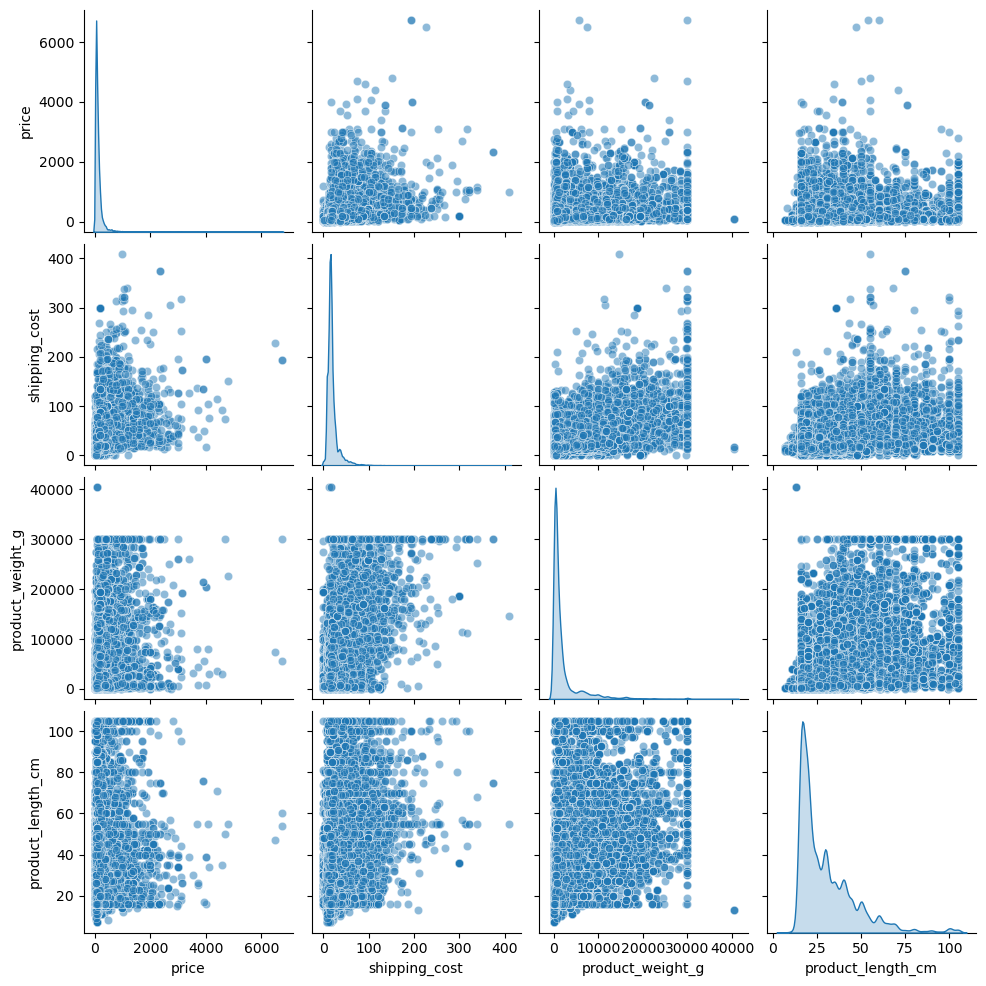

In [15]:
# Create a pair plot from the dataframe df_pairplot

sns.pairplot(
    (df_pairplot) ,
    diag_kind='kde',          # density plots on diagonal
    plot_kws={'alpha':0.5}    # make scatter points semi-transparent
)

plt.show()


### Interpretation:

#### Part 1: How Each Variable is Distributed

The plots along the diagonal of the grid show the distribution of each individual variable. A distribution tells us which values are common and which are rare.

* #### **Price**
    * **Observation:** The chart for `price` looks like a very steep slide. It's extremely high on the far left (near zero) and then quickly drops off, with a very long, flat tail to the right.
    * **Meaning:** This means the vast majority of products in the dataset have a **low price**. There are very few products that are expensive, and even fewer that are extremely expensive. These rare, high-priced items are called **outliers**.

* #### **Shipping Cost**
    * **Observation:** The `shipping_cost` chart looks very similar to the `price` chart. It's packed tightly on the left and has a long tail.
    * **Meaning:** Most items are **cheap to ship**. High shipping costs are rare. Just like with price, there are outliers with unusually high shipping fees.

* #### **Product Weight (g)**
    * **Observation:** The distribution for `product_weight_g` is unusual. While it's also bunched up on the left, it's not a smooth slide. There seems to be a big pile of products at a specific, very heavy weight (around 30,000g).
    * **Meaning:** Most products are lightweight. However, there's a significant group of products that all share the same heavy weight. This doesn't look like a natural distribution and might point to an issue with how the data was collected.

* #### **Product Length (cm)**
    * **Observation:** This chart is also "skewed to the right," meaning the peak is on the left with a tail stretching out.
    * **Meaning:** Most products are relatively short (likely under 50 cm). There are fewer and fewer products as the length increases, meaning very long items are uncommon.

---

#### Part 2: Variables to Explore Further

Based on these charts, I would definitely want to take a closer look at `product_weight_g` and `price`.

#### 1. Variable to Explore: `product_weight_g`

* **Why it's interesting:** The distribution is not natural. The sudden, large stack of products at the 30,000g mark is a red flag. This can also be seen in the scatterplots—they show a perfectly straight, vertical line of dots at that weight.
* **What to investigate:**
    * **Is this a data limit?** Perhaps the scale used to weigh items has a maximum limit of 30,000g and every item heavier than that is just recorded as 30,000g.
    * **Is it a default value?** Maybe for items where the weight was unknown, 30,000 was entered as a placeholder.
    * **What are these products?** Are all these 30,000g products from the same category (e.g., furniture)?
* **Why it's important:** If this data is to be used to predict shipping costs, this strange pattern could confuse the model and lead to wrong predictions. We need to understand and likely "clean" this data before using it.

#### 2. Variable to Explore: `price`

* **Why it's interesting:** The extreme skew and the presence of outliers. The average price would be misleading because it would be pulled up by the few super-expensive items.
* **What to investigate:**
    * **What are the outliers?** What are these products that cost over 6,000? Are they luxury goods, cars, or perhaps data entry errors? Understanding them is key.
    * **How does price relate to product categories?** Does the price distribution look different if we look at "electronics" versus "clothing"?
* **Why it's important:** For business decisions or building a prediction model, these extreme values can have a huge impact. We might need to treat them separately or use a mathematical transformation (like a logarithm) to make the distribution more balanced and easier to work with.

In summary, the pair plot reveals that the data has **highly skewed distributions** with significant outliers, especially in `price` and `shipping_cost`. Most importantly, it flags a **potential data quality issue** with `product_weight_g` that absolutely requires further investigation.

---

### 5. Answer the questions based on the conducted exploration

**How do payment types and installment counts affect order value or cancellations?**

- Partially Answerable. We can see the relationship with order value (price). The correlation matrix showed a weak positive correlation of 0.28 between payment_installments and price. This suggests that higher-priced items are slightly more likely to be offered with more payment installments. We have no data on other payment types or order cancellations.

---

**How do product characteristics (price, weight, size, description length) relate to sales?**

- Answerable. This is the core of our exploration so far. "Sales" can be inferred from the price of an individual item.

Price & Size/Weight: There are weak positive correlations between price and the physical dimensions (length, height, width, weight). In general, larger or heavier items tend to be slightly more expensive, but this is not a strong trend.

Price & Other Attributes: There is almost no linear relationship between price and product_name_length (correlation of 0.02) or product_photos_count (0.05). A longer name or more photos does not imply a higher price. There is a weak positive correlation between price and product_description_length (0.20).

Overall Distribution: The vast majority of products are low-priced, lightweight, and small in size, with a long tail of rare, expensive, and large items.

---

**How do freight costs relate to delivery performance, product price, and customer satisfaction?**

- Partially Answerable. We can answer the relationship with product price. Our analysis shows a moderate positive correlation of 0.42 between shipping_cost (freight cost) and price. Furthermore, shipping_cost has an even stronger correlation with product_weight_g (0.61), indicating weight is a more significant driver of freight cost than price is. We cannot comment on delivery performance or customer satisfaction.

---



### 6. New questions based on the early findings in the visual exploration

**Weight anomaly:**

- Why are so many products recorded with exactly 30,000g weight?

- Is this a real value, a default for missing data, or a system limit?

- Which product categories or sellers show this anomaly?

**High prices and shipping costs:**

- Which products have extremely high prices or shipping costs?

- Are these luxury items, electronics, vehicles, or something else?

- Are high shipping costs linked to international orders, express delivery, or fragile products?

- Should we treat these cases as valid special products or as data errors?

**Shipping cost drivers:**

- Why doesn’t weight fully explain shipping costs?

- Do dimensions (volume), destination, or seller location also play a role?

### 7. Possible Hypotheses at this point

**Weight vs. Shipping Cost**

- Heavier products have higher shipping costs, but weight alone does not fully explain shipping. Other factors like product size or destination may also matter.

**Category vs. Price**

- Product price depends more on product category (e.g., electronics, furniture, jewelry) than on physical attributes like weight or size.

**Data Anomaly at 30,000g**

- The frequent weight value of 30,000g is a data entry issue (system cap or default), not the true weight of those products.